In [3]:
from diffusers import AutoPipelineForText2Image, DEISMultistepScheduler
import torch,os,sys
model_name="Inkpunk-Diffusion"
pipe = AutoPipelineForText2Image.from_pretrained(model_name, torch_dtype=torch.float16, variant="fp16")
pipe.scheduler = DEISMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [5]:
# safertensors
from diffusers import StableDiffusionPipeline
import torch,os,sys
pipeline = StableDiffusionPipeline.from_single_file("./models/deliberate_v3.safetensors")
pipeline.to("cuda")


`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.21.0.dev0",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

## generate images

In [6]:
import random
seed=random.randint(1,100000000)
seed

27843147

In [7]:
prompt = "photo of pretty lady with short pink hair, beautiful face and blue eyes,wearing elegant dress, steel metal, elegant, sharp focus, soft lighting, vibrant colors"
seed=random.randint(1,100000000)
generator = torch.manual_seed(seed)
image = pipeline(prompt, generator=generator, num_inference_steps=25).images[0] 
img_filename= os.path.join("./img/", prompt.replace(" ", "_") +str(seed)+".png")
image.save(img_filename)
image

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

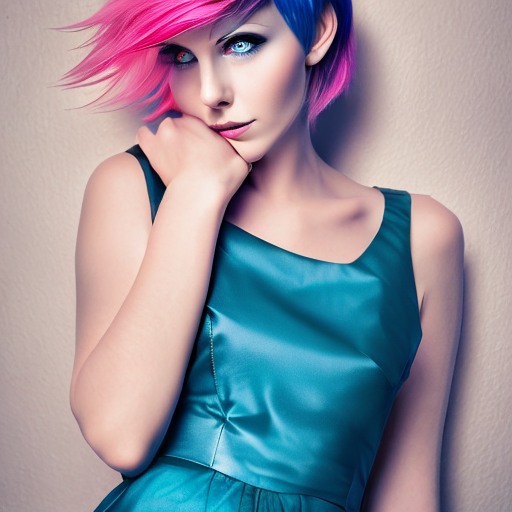

In [43]:
prompt = "photo of pretty lady with short pink hair, beautiful face and blue eyes,wearing elegant dress, steel metal, elegant, sharp focus, soft lighting, vibrant colors"
seed=random.randint(1,100000000)
generator = torch.manual_seed(seed)
image = pipe(prompt, generator=generator, num_inference_steps=25).images[0] 
img_filename= os.path.join("./img/", prompt.replace(" ", "_") +str(seed)+".png")
image.save(img_filename)
image
